In [1]:
import pandas as pd
import numpy as np

In [2]:
data_file_train = r'E:\Python\P1 Data\Consumer_Complaints_train.csv'

In [3]:
cc_train = pd.read_csv(data_file_train)

In [4]:
cc_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572


In [5]:
# analysis on issues and consumer conpliant narrative

In [6]:
cc_train['Issue'].isnull().sum()

0

In [7]:
text_issue = ' '.join(issue for issue in cc_train.Issue)
print ("There are {} words in the combination of all issues.".format(len(text_issue)))

There are 16583961 words in the combination of all issues.


In [8]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

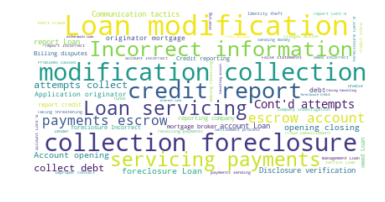

In [9]:
stopwords = set(STOPWORDS)
wordcloud_issue = WordCloud(stopwords=stopwords, background_color="white").generate(text_issue)

plt.imshow(wordcloud_issue, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
cc_train['Issue'].value_counts()

Loan modification,collection,foreclosure    80302
Incorrect information on credit report      58527
Loan servicing, payments, escrow account    51403
Cont'd attempts collect debt not owed       36367
Account opening, closing, or management     23568
                                            ...  
Lost or stolen check                           20
Incorrect exchange rate                        13
Lender damaged or destroyed vehicle             5
Lender sold the property                        2
Lender damaged or destroyed property            1
Name: Issue, Length: 95, dtype: int64

In [11]:
cc_train['Consumer complaint narrative'].value_counts()

This company continues to report on my credit report after I sent them a letter telling them that this account was not mine and I have no idea what it is or who it belongs to! \n\nI asked for proof of a signed contract, I asked for a license to collect in my state, I asked for copies of all information referenced for this debt and still to date, I have not received anything but harassment from this company! \n\nTHIS IS NOT MY DEBT! \n\nI WANT THIS ACCOUNT REMOVED FROM MY CREDIT REPORT AND THIS COMPANY TO STOP CONTACTING ME IMMEDIATELY! \n                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [12]:
cc_train.rename(columns={'Consumer complaint narrative': 'Consumer_complaint_narrative'}, inplace=True)
cc_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572


In [13]:
cc_train['Consumer_complaint_narrative'].fillna('missing', inplace=True)

In [14]:
text_complaint = ' '.join(complaint for complaint in cc_train.Consumer_complaint_narrative)
print ("There are {} words in the combination of all complaints.".format(len(text_complaint)))

There are 82363572 words in the combination of all complaints.


In [15]:
stopwords.update(['missing', 'XXXX', 'XXX', 'XX'])

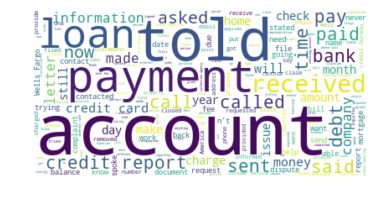

In [16]:
wordcloud_complaint = WordCloud(stopwords=stopwords, background_color='White').generate(text_complaint)
plt.figure()
plt.imshow(wordcloud_complaint, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
cc_train['Product'].value_counts()

Mortgage                   156175
Debt collection             86544
Credit reporting            81115
Credit card                 57358
Bank account or service     54403
Consumer Loan               18599
Student loan                14918
Money transfers              3349
Payday loan                  3219
Prepaid card                 2226
Other financial service       507
Virtual currency                8
Name: Product, dtype: int64

In [18]:
cc_train['Company public response'].value_counts()

Company chooses not to provide a public response                                                                           41915
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            25672
Company believes it acted appropriately as authorized by contract or law                                                   16040
Company believes complaint caused principally by actions of third party outside the control or direction of the company     1460
Company believes the complaint is the result of a misunderstanding                                                          1418
Company disputes the facts presented in the complaint                                                                       1395
Company believes complaint is the result of an isolated error                                                               1062
Company can't verify or dispute the facts in the complaint                                       

In [19]:
cc_train['Company response to consumer'].value_counts()

Closed with explanation            354310
Closed with non-monetary relief     61491
Closed with monetary relief         32925
Closed without relief               14145
Closed                              11365
Closed with relief                   4184
Untimely response                       1
Name: Company response to consumer, dtype: int64

In [21]:
cc_train.groupby(['Company response to consumer','Consumer disputed?']).size()

Company response to consumer     Consumer disputed?
Closed                           No                      8811
                                 Yes                     2554
Closed with explanation          No                    271519
                                 Yes                    82791
Closed with monetary relief      No                     29192
                                 Yes                     3733
Closed with non-monetary relief  No                     53531
                                 Yes                     7960
Closed with relief               No                      3624
                                 Yes                      560
Closed without relief            No                     10313
                                 Yes                     3832
Untimely response                Yes                        1
dtype: int64

In [22]:
cc_train['Company'].value_counts()

Bank of America                        46336
Wells Fargo & Company                  35453
JPMorgan Chase & Co.                   28852
Equifax                                28832
Experian                               26794
                                       ...  
Western Mortgage Services                  1
G & D COMPLIANCE                           1
The Law Offices of Burr & Reid, LLP        1
The Cooper Health System                   1
Credit Resolutions, LLC                    1
Name: Company, Length: 3276, dtype: int64

In [23]:
cc_train['State'].value_counts()

CA    70001
FL    46089
TX    35895
NY    32750
GA    21258
      ...  
MH       25
MP       15
AS       14
PW        9
AA        8
Name: State, Length: 62, dtype: int64

In [24]:
cc_train['Tags'].value_counts()

Older American                   39064
Servicemember                    22592
Older American, Servicemember     5550
Name: Tags, dtype: int64

In [25]:
cc_train.isnull().sum()

Date received                        0
Product                              0
Sub-product                     138473
Issue                                0
Sub-issue                       292625
Consumer_complaint_narrative         0
Company public response         388029
Company                              0
State                             3839
ZIP code                          3848
Tags                            411215
Consumer consent provided?      342934
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [26]:
cc_train['Submitted via'].value_counts()

Web            313916
Referral        91352
Phone           34417
Postal mail     31448
Fax              7032
Email             256
Name: Submitted via, dtype: int64